## Advanced Lane Finding + Vehicle Detection Project

This project is a combination of Advanced Lane Finding and Vehicle Detection.



* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [1]:
import importlib
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roadlanes import draw_lane
import roadlanes
import adv_lane_lines
import searchlines
import perspectivetransform
import correctcamera
import object_detection_findmatches
from glob import glob
import object_detection_utils
import object_detection_colorspaces
import object_detection_fecvector
import object_detection_car_notcar

In [2]:
importlib.reload(adv_lane_lines)
importlib.reload(roadlanes)
importlib.reload(searchlines)
importlib.reload(perspectivetransform)
importlib.reload(correctcamera)

<module 'correctcamera' from 'C:\\Users\\rafal\\Documents\\GitHub\\Udacity-CarND\\CarND-Vehicle-Detection-master\\correctcamera.py'>

# Object Finding - using various methods

## This method uses historgrams of different colors to identify a pattern characteristic for an object

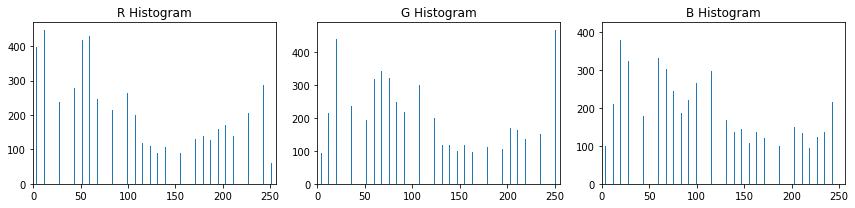

In [3]:
importlib.reload(object_detection_utils)
object_detection_utils.main_histogram()

## Using color spaces and clustering to discover objects

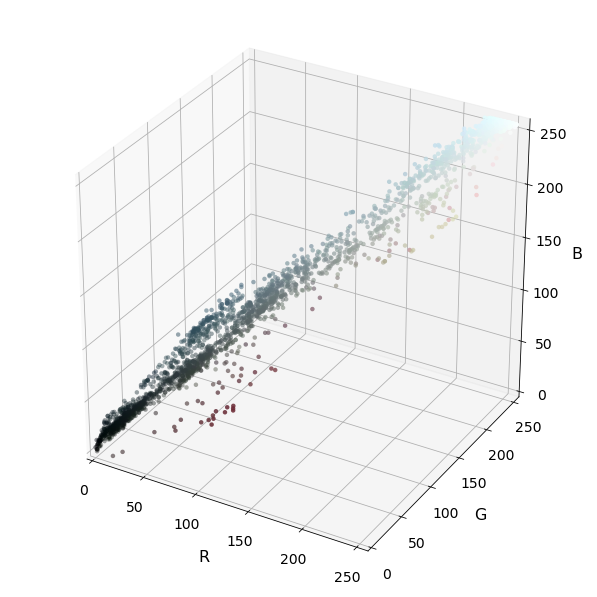

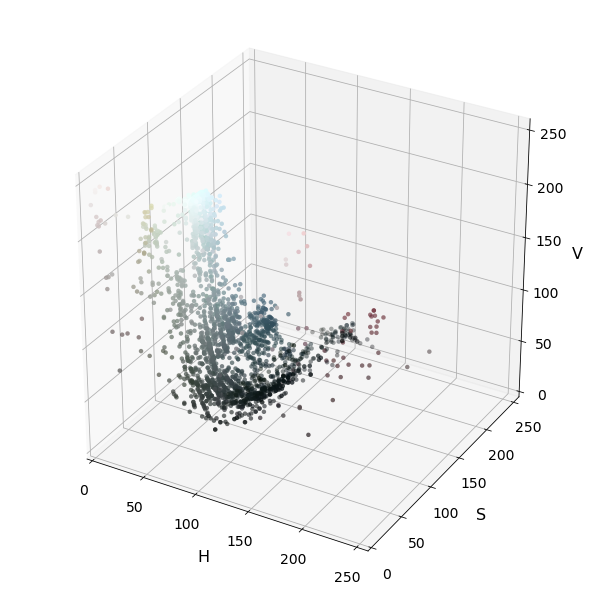

In [4]:
import object_detection_colorspaces
importlib.reload(object_detection_colorspaces)
object_detection_colorspaces.main_color_spaces()

## Object detection using template matching

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


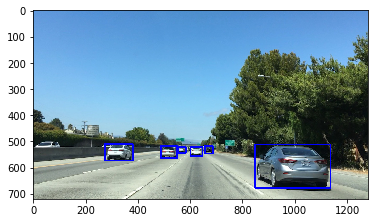

In [5]:
import object_detection_findmatches
importlib.reload(object_detection_findmatches)
object_detection_findmatches.main_drawboxes()

## using feature vector approach for pictures of lower resolution

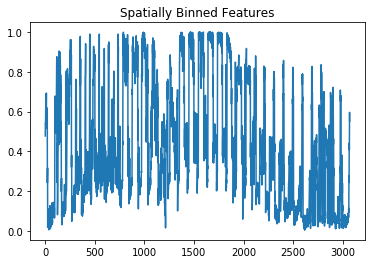

In [6]:
import object_detection_fecvector
importlib.reload(object_detection_fecvector)
object_detection_fecvector.main_fecvector()

## Image dataset analysis: cars vs. non-cars

util_images/vehicles\GTI_Far\image0000.png
Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


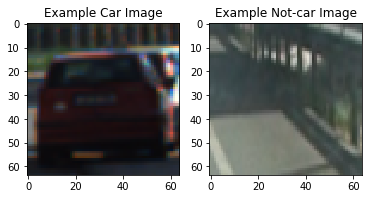

In [7]:
import object_detection_car_notcar
importlib.reload(object_detection_car_notcar)
object_detection_car_notcar.main_look_for_car()

In [8]:
import object_detection_hog_features

# Image data Exploration

# Let's see what kind of images we have for vehicles and non-vehicle objects

In [9]:
car_images = glob('util_images/vehicles/**/*.png')
noncar_images = glob('util_images/non-vehicles/**/*.png')

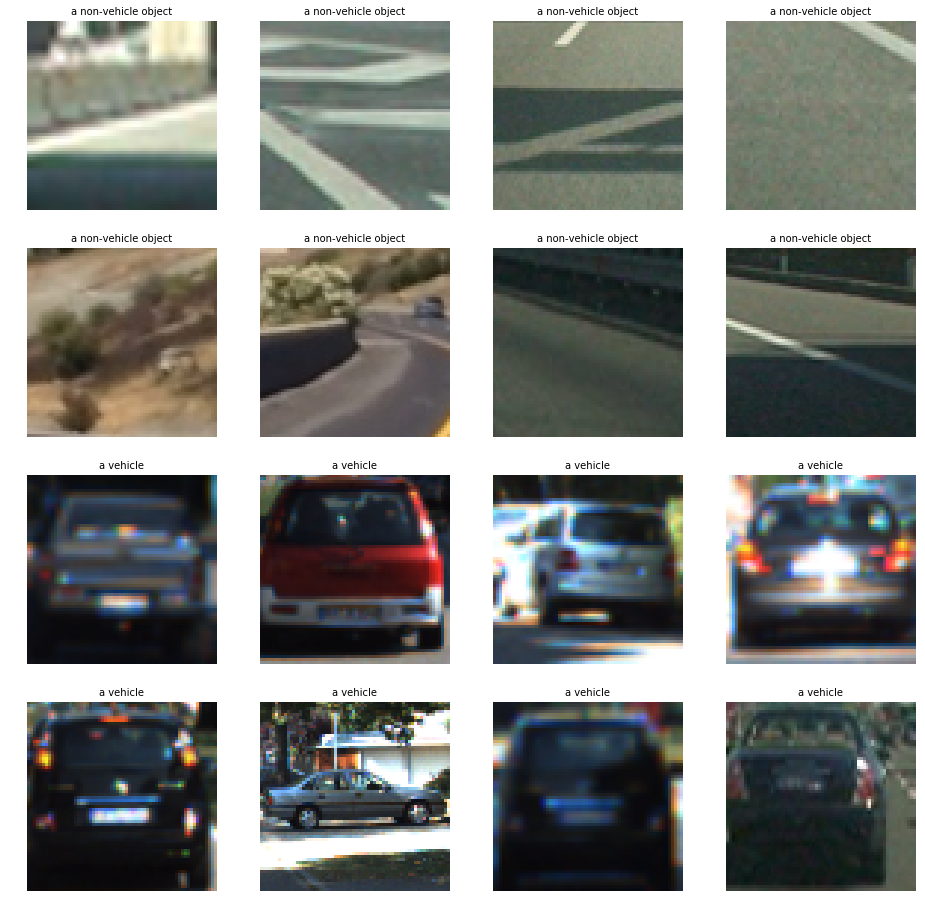

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
axs = axs.ravel()

for i in np.arange(8):
    img = cv2.imread(noncar_images[np.random.randint(0,len(noncar_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('a non-vehicle object', fontsize=10)
    axs[i].imshow(img)

for i in np.arange(8,16):
    img = cv2.imread(car_images[np.random.randint(0,len(car_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('a vehicle', fontsize=10)
    axs[i].imshow(img)
    


In [11]:
print("Number of vehicle images: {}".format(len(car_images)))
print("Number of non-vehicle images: {}".format(len(noncar_images)))

Number of vehicle images: 8792
Number of non-vehicle images: 8968


# Exploring various models and choose the best one

## Calculation of models...

In [12]:
import object_detection_hog_features
importlib.reload(object_detection_hog_features)
experiments_dict = object_detection_hog_features.main_hog()

Color Space: RGB   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 8, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 9, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 9, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 10, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 10, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 11, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: RGB   , Hog Channel: ALL, Orient: 11, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: HLS   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: HLS   , Hog Channel: ALL, Orient: 8, Pix per Cell: 16, Cell per Block: 2: calculation
Color 

## Displaying results of calculations for various models...

In [13]:
importlib.reload(object_detection_hog_features)
object_detection_hog_features.print_results(experiments_dict)

CS means Color Space
Or means Orientation
C/B means Cells per Block
P/C means Pixels per Cell


| CS:RGB	| Or:08	| C/B:2	| P/C:08	| Acc 1.0000	| F:007872	|
| CS:RGB	| Or:08	| C/B:2	| P/C:16	| Acc 0.9750	| F:004032	|
| CS:RGB	| Or:09	| C/B:2	| P/C:08	| Acc 1.0000	| F:008460	|
| CS:RGB	| Or:09	| C/B:2	| P/C:16	| Acc 0.9750	| F:004140	|
| CS:RGB	| Or:10	| C/B:2	| P/C:08	| Acc 1.0000	| F:009048	|
| CS:RGB	| Or:10	| C/B:2	| P/C:16	| Acc 0.9250	| F:004248	|
| CS:RGB	| Or:11	| C/B:2	| P/C:08	| Acc 1.0000	| F:009636	|
| CS:RGB	| Or:11	| C/B:2	| P/C:16	| Acc 0.9000	| F:004356	|
| CS:HLS	| Or:08	| C/B:2	| P/C:08	| Acc 1.0000	| F:007872	|
| CS:HLS	| Or:08	| C/B:2	| P/C:16	| Acc 1.0000	| F:004032	|
| CS:HLS	| Or:09	| C/B:2	| P/C:08	| Acc 1.0000	| F:008460	|
| CS:HLS	| Or:09	| C/B:2	| P/C:16	| Acc 1.0000	| F:004140	|
| CS:HLS	| Or:10	| C/B:2	| P/C:08	| Acc 1.0000	| F:009048	|
| CS:HLS	| Or:10	| C/B:2	| P/C:16	| Acc 1.0000	| F:004248	|
| CS:HLS	| Or:11	| C/B:2	| P/C:08	| Acc 1.0000	| F:009636	|
| CS

## Getting results better than specified accuracy

In [14]:
# getting models with accuacy 0.99 or higher
importlib.reload(object_detection_hog_features)
results_best_models = object_detection_hog_features.get_models(experiments_dict, accuracy=0.991)
results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="HLS")
object_detection_hog_features.print_results({"best_model": results_best_model})

CS means Color Space
Or means Orientation
C/B means Cells per Block
P/C means Pixels per Cell


| CS:HLS	| Or:08	| C/B:2	| P/C:08	| Acc 1.0000	| F:007872	|


# Extracing HOG (Histogram of Oriented Gradients) features for 2 examples

Text(0.5,1,'Non-Car HOG')

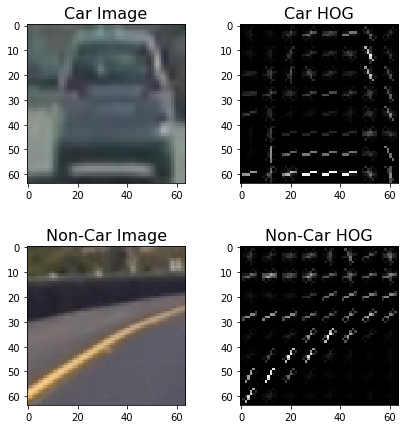

In [15]:
car_img = mpimg.imread(car_images[5])
_, car_dst = object_detection_utils.get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
noncar_img = mpimg.imread(noncar_images[5])
_, noncar_dst = object_detection_utils.get_hog_features(noncar_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(noncar_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(noncar_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)

## Sliding windows algorithm - used when analyzing an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


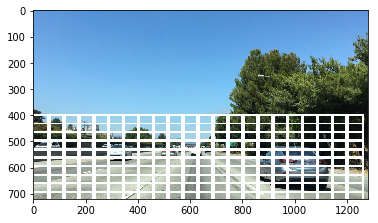

In [16]:
import object_detection_sliding_window
import object_detection_utils
importlib.reload(object_detection_utils)
importlib.reload(object_detection_sliding_window)
object_detection_sliding_window.sliding_window_main()

## Using combination of boxes where potential vehicles could be and heatmaps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


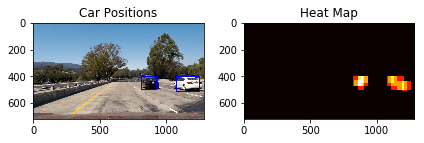

In [17]:
import object_detection_heatmap
importlib.reload(object_detection_heatmap)
object_detection_heatmap.main_heatmap()

## the best HLS model

Color Space: HLS   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Number of rectangles: 25
Number of rectangles: 14
Number of rectangles: 10


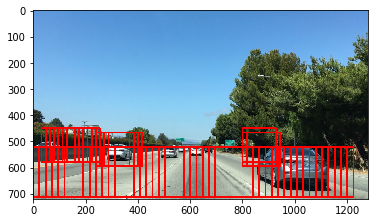

In [18]:
import object_detection_hog_features
import object_detection_hog_subsampling
importlib.reload(object_detection_utils)
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_hog_subsampling)

results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="HLS")
object_detection_hog_subsampling.main_hog_subsampling(results_best_model, img_file="util_images/bbox-example-image.png")

## the best YUV model

Color Space: YUV   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Number of rectangles: 20
Number of rectangles: 121
Number of rectangles: 213


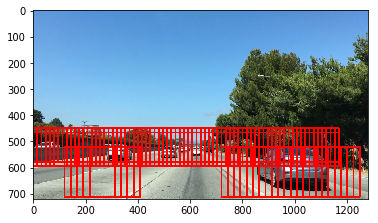

In [19]:
import object_detection_hog_features
import object_detection_hog_subsampling
importlib.reload(object_detection_utils)
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_hog_subsampling)

results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="YUV")
object_detection_hog_subsampling.main_hog_subsampling(results_best_model, img_file="util_images/bbox-example-image.png")

## the best HSV model

Color Space: HSV   , Hog Channel: ALL, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Number of rectangles: 34
Number of rectangles: 11
Number of rectangles: 17


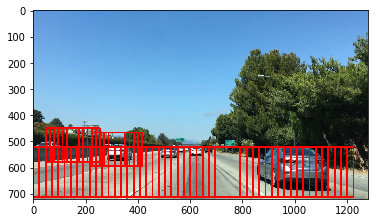

In [20]:
import object_detection_hog_features
import object_detection_hog_subsampling
importlib.reload(object_detection_utils)
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_hog_subsampling)

results_best_model = object_detection_hog_features.get_best_model(experiments_dict, model_type="HSV")
object_detection_hog_subsampling.main_hog_subsampling(results_best_model, img_file="util_images/bbox-example-image.png")

In [21]:
import importlib
import object_detection_search_and_classify
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_search_and_classify)
model_params=dict()
model_params["color_item"] = "YUV"
model_params["orient"] = 9
model_params["pix_per_cell"] = 16
model_params["cells_per_block"] = 2
model_params["hog_channel"] = "ALL"
model_params["sample_size"] = 8700
model = object_detection_hog_features.train_model(model_params)

Color Space: YUV   , Hog Channel: ALL, Orient: 9, Pix per Cell: 16, Cell per Block: 2: calculation


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


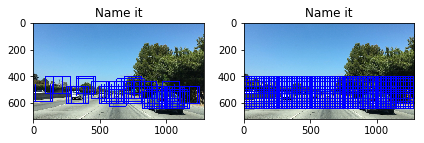

In [22]:
importlib.reload(object_detection_search_and_classify)
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


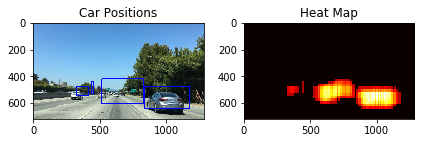

In [23]:
import importlib
import object_detection_search_and_classify
importlib.reload(object_detection_search_and_classify)
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, use_heatmap=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


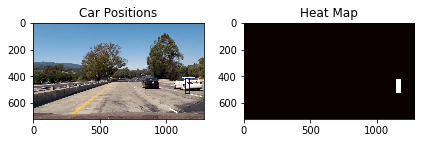

In [24]:
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, image_file="test_images/test1.png", use_heatmap=True)

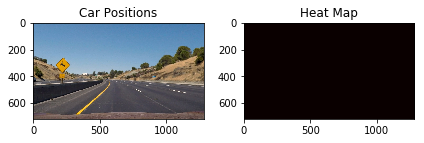

In [25]:
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, image_file="test_images/test2.png", use_heatmap=True)

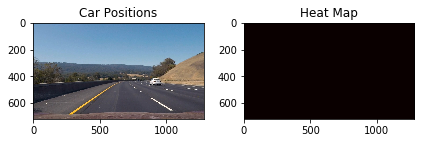

In [26]:
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, image_file="test_images/test3.png", use_heatmap=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


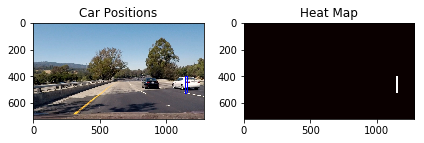

In [27]:
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, image_file="test_images/test4.png", use_heatmap=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


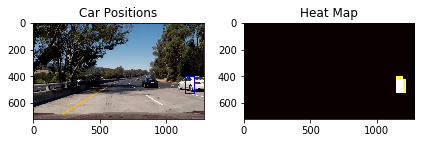

In [28]:
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, image_file="test_images/test5.png", use_heatmap=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


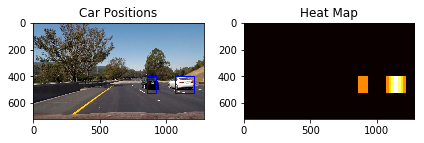

In [29]:
processed_image = object_detection_search_and_classify.main_search_and_classify(model=model, image_file="test_images/test6.png", use_heatmap=True)

# Video processing
## Defining frame_proc function that will process each video frame

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


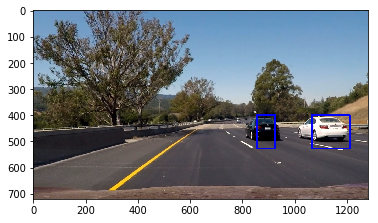

In [30]:
import importlib
import object_detection_search_and_classify
importlib.reload(object_detection_hog_features)
importlib.reload(object_detection_search_and_classify)

def frame_proc(img):
    return object_detection_search_and_classify.main_search_and_classify(model=model, image=img, image_file=None, use_heatmap=True, display_results=False)

picture = mpimg.imread("test_images/test6.png")
#plt.figure()
#plt.imshow(frame_proc(picture))

picturee = cv2.imread("test_images/test6.png")
picturee = cv2.cvtColor(picturee, cv2.COLOR_BGR2RGB)
picturee = picturee.astype(np.float32) / 255
plt.figure()
plt.imshow(frame_proc(picturee))

## processing video file

In [39]:
from moviepy.editor import VideoFileClip

def process_image(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = 255 * frame_proc(image.astype(np.float32) / 255)
    return result

#video_output_name = 'project_video_processed.mp4'
#video_input = VideoFileClip("project_video.mp4")
video_output_name = 'project_test_processed.mp4'
video_input = VideoFileClip("test_video.mp4")
video_output = video_input.fl_image(process_image)
%time video_output.write_videofile(video_output_name, audio=False)

OSError: [WinError 6] The handle is invalid